In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [90]:

datos = pd.read_excel('base_prueba_tecnica.xlsx')  


In [91]:
datos.head(10)

,ID,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuación de Crédito,Región,Comportamiento en linea,Compras en el ultimo año
0,1,21,Masculino,222011,2297,335,Sur,8,81
1,2,26,Masculino,239229,3420,329,Oeste,10,27
2,3,38,Masculino,716278,36965,711,Oeste,9,82
3,4,64,Femenino,697325,9846,855,Sur,2,6
4,5,52,Femenino,1032569,6607,989,Sur,3,2
5,6,25,Masculino,219830,2340,483,Norte,9,43
6,7,56,Masculino,1068126,12830,930,Sur,1,10
7,8,21,Femenino,224981,1410,328,Este,9,24
8,9,54,Femenino,1507977,23614,514,Oeste,9,99
9,10,67,Masculino,1074952,19856,808,Sur,2,4


In [92]:
datos['Genero Num'] = 0
for i in datos:
    if i in datos['Genero']=='Femenino':
        datos['Genero Num'][i] = 1
    else:
        datos['Genero Num'] = 2

In [93]:
for i in datos:
    print(datos[i])

0          1
1          2
2          3
3          4
4          5
        ... 
2995    2996
2996    2997
2997    2998
2998    2999
2999    3000
Name: ID, Length: 3000, dtype: int64
0       21
1       26
2       38
3       64
4       52
        ..
2995    31
2996    46
2997    26
2998    21
2999    21
Name: Edad, Length: 3000, dtype: int64
0       Masculino
1       Masculino
2       Masculino
3        Femenino
4        Femenino
          ...    
2995    Masculino
2996    Masculino
2997    Masculino
2998     Femenino
2999     Femenino
Name: Genero, Length: 3000, dtype: object
0        222011
1        239229
2        716278
3        697325
4       1032569
         ...   
2995    1724725
2996    1683667
2997     193267
2998     106725
2999     152149
Name: Ingresos Anuales, Length: 3000, dtype: int64
0        2297
1        3420
2       36965
3        9846
4        6607
        ...  
2995    25756
2996    29508
2997     5940
2998     1762
2999     5562
Name: Gasto Mensual, Length: 3000, dtyp

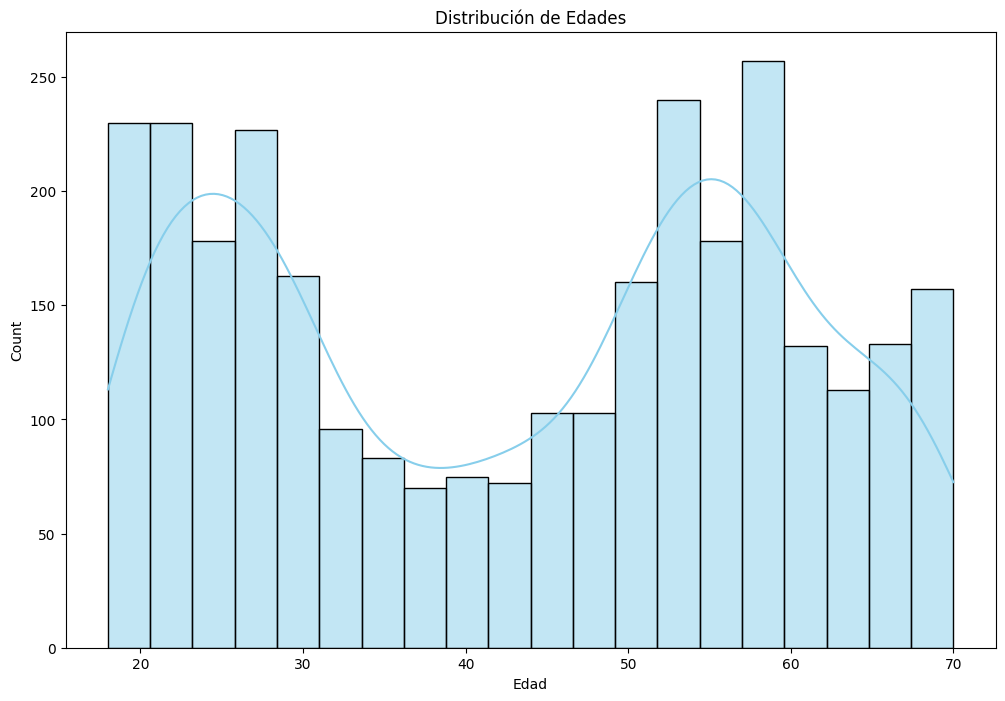

In [94]:
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Edad', bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.show()

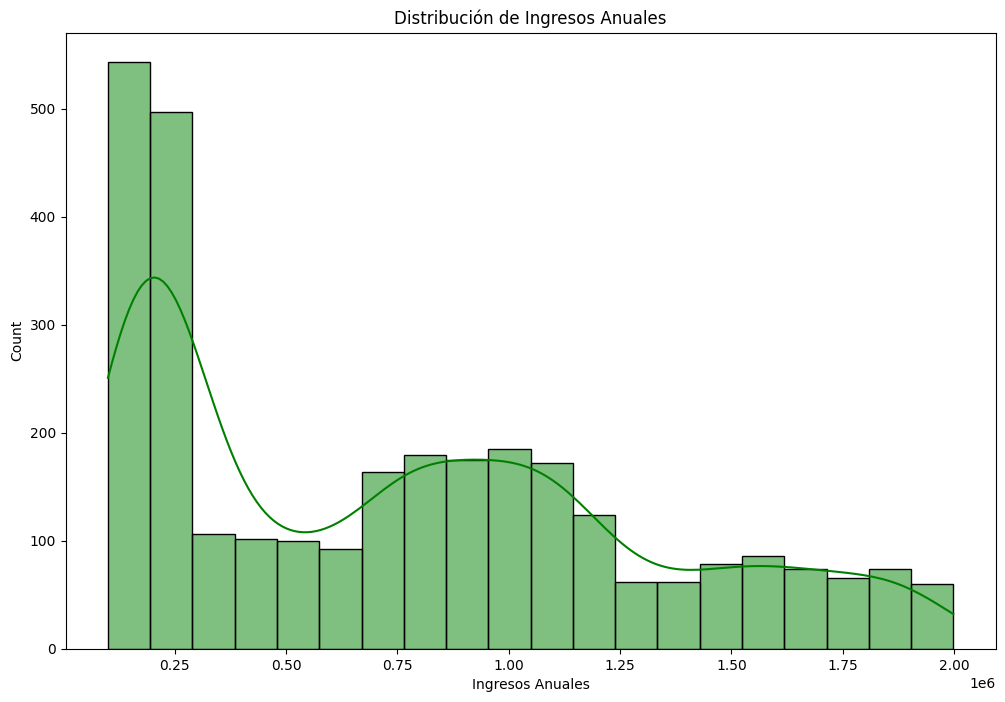

In [95]:
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x='Ingresos Anuales', bins=20, kde=True, color='green')
plt.title('Distribución de Ingresos Anuales')
plt.xlabel('Ingresos Anuales')
plt.show()

In [96]:

datos.isnull().sum()

ID                          0
Edad                        0
Genero                      0
Ingresos Anuales            0
Gasto Mensual               0
Puntuación de Crédito       0
Región                      0
Comportamiento en linea     0
Compras en el ultimo año    0
Genero Num                  0
dtype: int64

Aqui se muestra no hay valores nulos dentro del set de datos verificando columna x columna

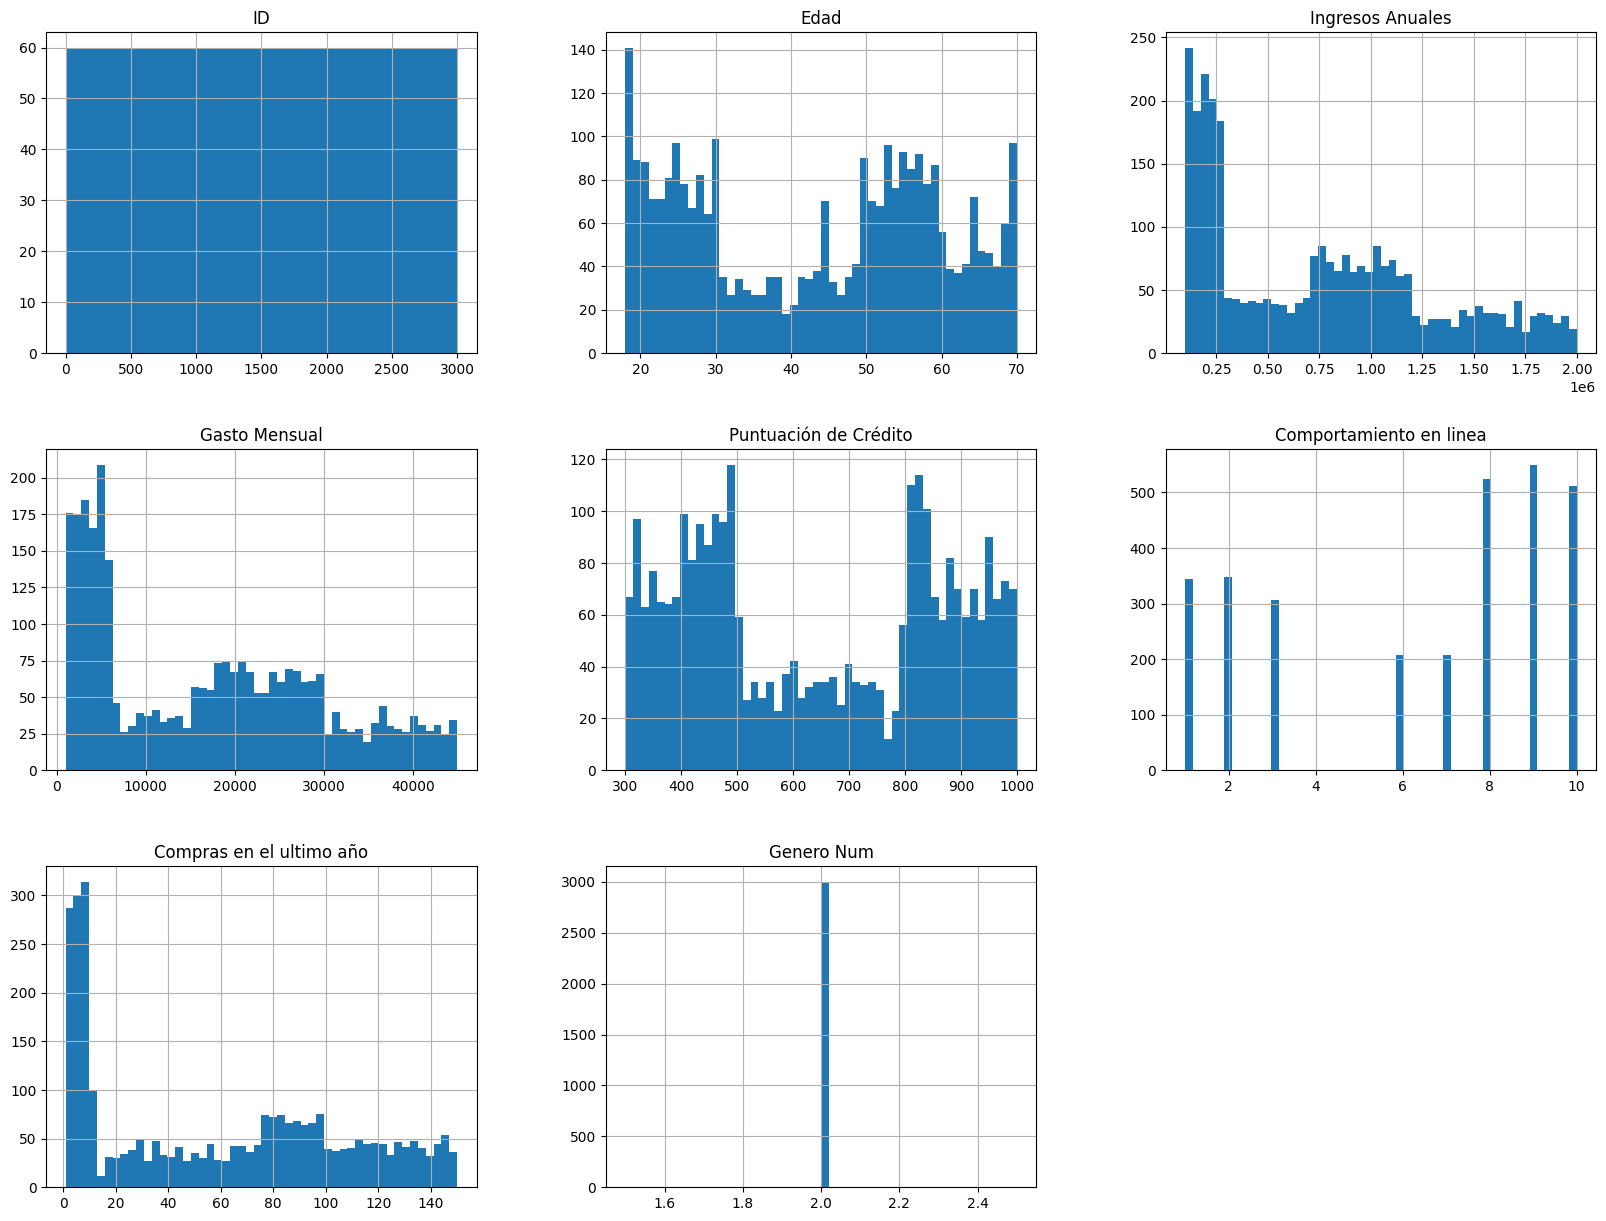

In [97]:
datos.hist(bins=50, figsize=(20,15))
plt.show()

In [98]:
seleccion = datos[['Edad', 'Puntuación de Crédito', 'Ingresos Anuales', 'Gasto Mensual', 'Comportamiento en linea', 'Compras en el ultimo año']]
seleccion.head()

,Edad,Puntuación de Crédito,Ingresos Anuales,Gasto Mensual,Comportamiento en linea,Compras en el ultimo año
0,21,335,222011,2297,8,81
1,26,329,239229,3420,10,27
2,38,711,716278,36965,9,82
3,64,855,697325,9846,2,6
4,52,989,1032569,6607,3,2


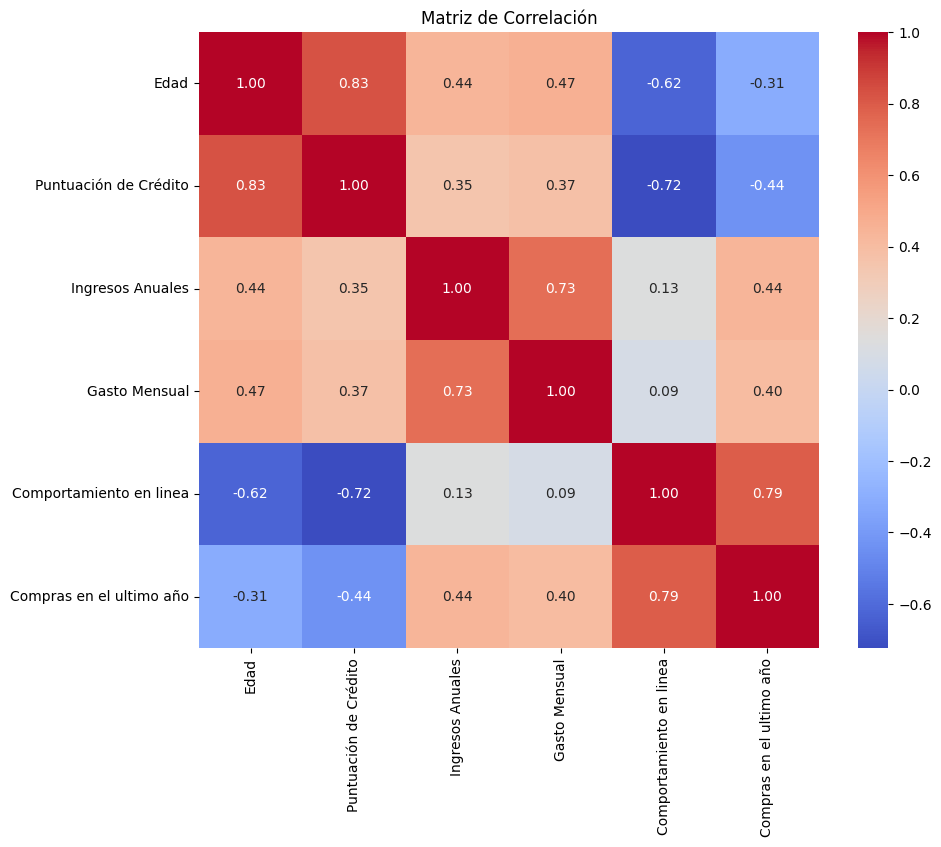

In [99]:
#Codigo para Realizar la Matriz de correlacion y saber que variables estan relacionadas
plt.figure(figsize=(10, 8))
sns.heatmap(seleccion.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Las variables que más se correlacionan en el conjunto de datos son:
- Comportamiento en linea vs Compras en el último año
- Gasto Mensual vs Ingresos Anuales
- Edad vs puntuación de credito

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21960\878518344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['Cluster'] = kmeans.labels_


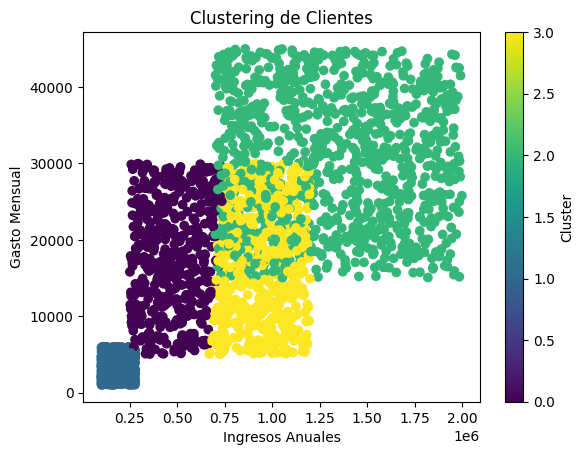

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


var1 = StandardScaler()
datos_escalados = var1.fit_transform(seleccion)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_escalados)

seleccion['Cluster'] = kmeans.labels_

plt.scatter(seleccion['Ingresos Anuales'], seleccion['Gasto Mensual'], c=seleccion['Cluster'], cmap='viridis')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Gasto Mensual')
plt.title('Clustering de Clientes')
plt.colorbar(label='Cluster')
plt.show()



In [120]:

inertia = kmeans.inertia_
print("Inercia del modelo:", inertia)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(datos_escalados, kmeans.labels_)
print("Coeficiente de silueta promedio:", silhouette_avg)



Inercia del modelo: 3080.2223549417663
Coeficiente de silueta promedio: 0.6510603462514382


Codigo utlizado para verificar la calidad de los datos a traves de metricas como la inercia y coeficiente de silueta

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21960\607826544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['Cluster'] = kmeans.labels_


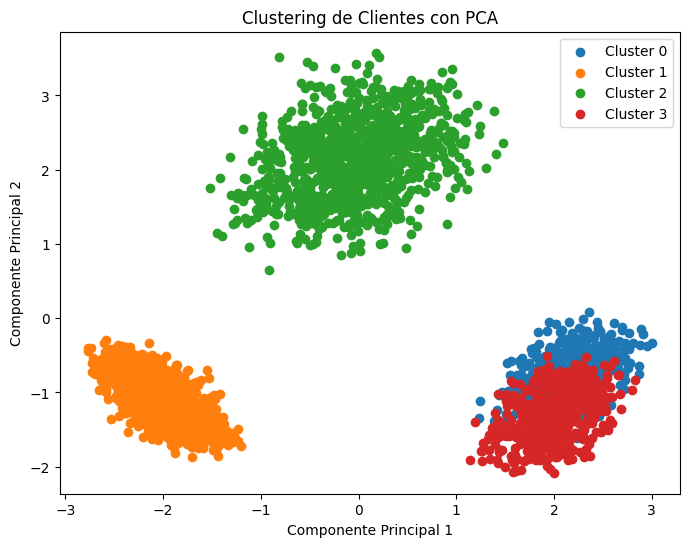

In [121]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(datos_escalados)

seleccion['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(X_pca[seleccion['Cluster'] == cluster, 0], X_pca[seleccion['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de Clientes con PCA')
plt.legend()
plt.show()

In [122]:

print("Interpretación de los Clusters:")
print(seleccion.groupby('Cluster')[['Ingresos Anuales', 'Gasto Mensual']].mean())

Interpretación de los Clusters:
         Ingresos Anuales  Gasto Mensual
Cluster                                 
0            4.730234e+05   17907.893082
1            1.870718e+05    3491.469000
2            1.328203e+06   30311.893000
3            9.497689e+05   16757.554493
